In [4]:
import dataset as dt
import argparse 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch 
import os
import simulator as s


from model_def import VariationalAutoEncoder_noswidth_RealNoise, train, save_model

In [5]:
#python creating_dataset.py 339 50 1300, 1400 0.1088 20000 200 300 10 75
#python test.py 340 171 1259 1387 0.1088 20000 100 900 10 250

def rand_interv(a,b,n):
  u = torch.rand(n)
  return (a-b)*u+b 

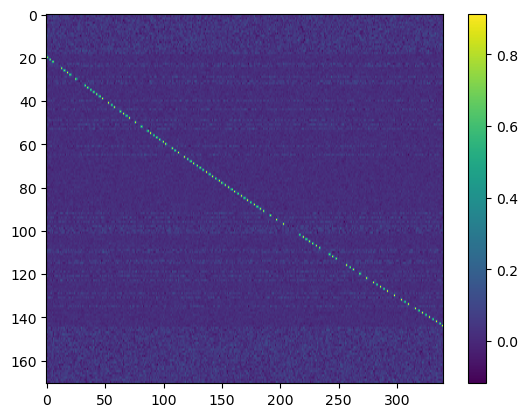

In [19]:
x_size = 340
y_size = 171
nu_i = 1259 
nu_f = 1387
t = 0.25

size = 2000
DM_min = 200
DM_max = 300
batch_size= 10
epochs= 50

DM = torch.tensor([1500])
width_train = 0.0000005*torch.ones(1)
nu = torch.linspace(nu_i, nu_f, y_size)
nu0 = torch.median(nu)
time = torch.linspace(-t, t, x_size)
swidth_train = rand_interv(4000,5000,1)
noises_train = rand_interv(3,8, 1)



train_images = s.simulate_noswidth(DM,width_train,nu,nu0,time,swidth_train, x_size, y_size, noises_train ,plot_flag=True)


#cheat_sheet = pd.read_csv('CheatSheet1.csv',header =0)

In [4]:
""" cheat_sheet = pd.read_csv('CheatSheet1.csv',header =0)

files = []
dms = []
for i,val in enumerate(cheat_sheet['cand name']):
    line = val.replace('./','')
    line = line.split('_')
    if cheat_sheet['FETCH prediction'][i] and cheat_sheet['Real Burst'][i]:
        files.append([cheat_sheet['lilo name'][i],float(line[4]),float(line[6])]) 

files_noise = []
for file in files: 
    if not os.path.exists(file[0]+'.fil'):
        pass
    else: 
        #print(data.shape)
        files_noise.append(file[0])



train_dataloader, test_dataloader, train_dataset, test_dataset = dt.SaveDatasetToFile(DM_min,DM_max, nu_i, nu_f, 
                                                    size, t, x_size, y_size, batch_size,files_noise, test_flag=True) """


                                                    

" cheat_sheet = pd.read_csv('CheatSheet1.csv',header =0)\n\nfiles = []\ndms = []\nfor i,val in enumerate(cheat_sheet['cand name']):\n    line = val.replace('./','')\n    line = line.split('_')\n    if cheat_sheet['FETCH prediction'][i] and cheat_sheet['Real Burst'][i]:\n        files.append([cheat_sheet['lilo name'][i],float(line[4]),float(line[6])]) \n\nfiles_noise = []\nfor file in files: \n    if not os.path.exists(file[0]+'.fil'):\n        pass\n    else: \n        #print(data.shape)\n        files_noise.append(file[0])\n\n\n\ntrain_dataloader, test_dataloader, train_dataset, test_dataset = dt.SaveDatasetToFile(DM_min,DM_max, nu_i, nu_f, \n                                                    size, t, x_size, y_size, batch_size,files_noise, test_flag=True) "

In [5]:
import your
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

your.__version__

'0.6.7'

In [6]:
test_dataloader = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_test_images.pt')
train_dataloader = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_train_images.pt')
test_dataset = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_test_dataset.pt')
train_dataset = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_train_dataset.pt')

In [7]:
nu = torch.linspace(nu_i, nu_f, y_size)
nu0 = torch.median(nu)

time = torch.linspace(-0.1, 0.08, x_size)

input_dim = x_size * y_size                               
model = VariationalAutoEncoder_noswidth_RealNoise(input_dim, x_size, y_size, nu, nu0,time)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model.to(device)

print('Created the model')




cpu
Created the model


In [8]:
lr = 1e-3

optimizer = torch.optim.Adam(model.parameters(),lr=lr)

model = train(model,epochs, train_dataloader, test_dataloader,optimizer)

print('Finished training')

Average DMs error in epoch prediction: 9.8405 
Average SWIDTH error in epoch prediction: 9.9542 
===> Epoch 1 Average loss: 0.0052
===>Test loss: 0.6986
Average DMs error in epoch prediction: 9.5771 
Average SWIDTH error in epoch prediction: 9.8853 
===> Epoch 2 Average loss: 0.0052
===>Test loss: 0.6090
Average DMs error in epoch prediction: 9.4415 
Average SWIDTH error in epoch prediction: 9.7918 
===> Epoch 3 Average loss: 0.0052
===>Test loss: 0.5717
Average DMs error in epoch prediction: 9.4848 
Average SWIDTH error in epoch prediction: 9.7728 
===> Epoch 4 Average loss: 0.0052
===>Test loss: 0.4931
Average DMs error in epoch prediction: 9.3976 
Average SWIDTH error in epoch prediction: 9.7333 
===> Epoch 5 Average loss: 0.0052
===>Test loss: 0.4394
Average DMs error in epoch prediction: 9.4603 
Average SWIDTH error in epoch prediction: 9.7787 
===> Epoch 6 Average loss: 0.0052
===>Test loss: 0.4912
Average DMs error in epoch prediction: 9.3702 
Average SWIDTH error in epoch predi

In [24]:
rand_index = rand_index = torch.randint(0,50,(10,))
super_test = []
for val in rand_index:
  super_test.append(test_dataset[val])
super_test = []
for val in rand_index:
  super_test.append(test_dataset[val])

tensor(51.6155)
DM_pred 261.4052, DM_obs 250.0105. SWidth_pred 50.5588, SWidth_obs 4262.7490 


<Figure size 2000x1000 with 0 Axes>

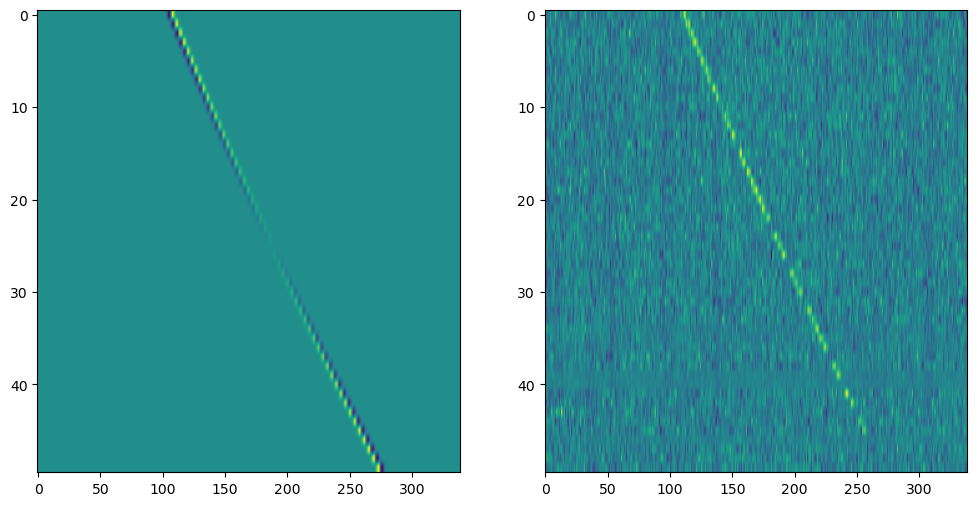

tensor(49.5813)
DM_pred 261.4052, DM_obs 200.5200. SWidth_pred 50.5588, SWidth_obs 4669.7319 


<Figure size 2000x1000 with 0 Axes>

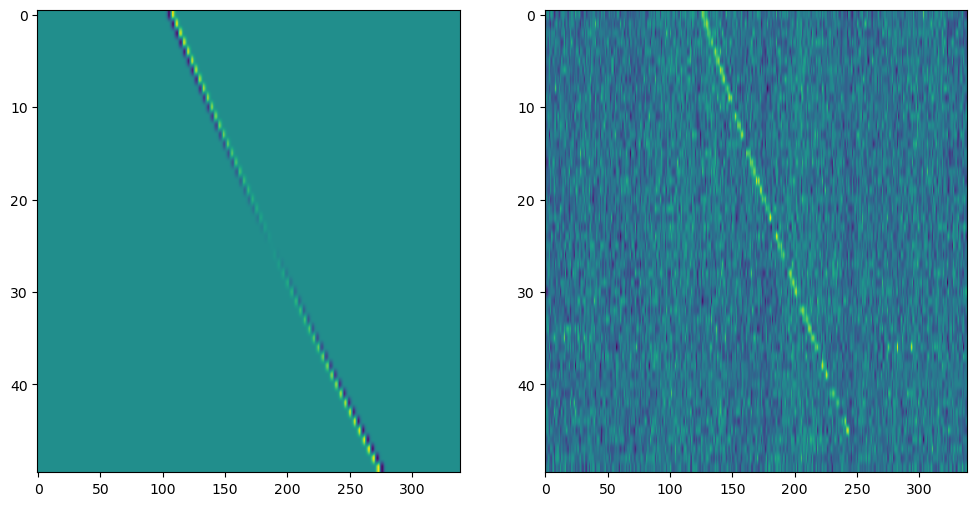

tensor(50.6285)
DM_pred 261.4052, DM_obs 229.3479. SWidth_pred 50.5588, SWidth_obs 4760.3413 


<Figure size 2000x1000 with 0 Axes>

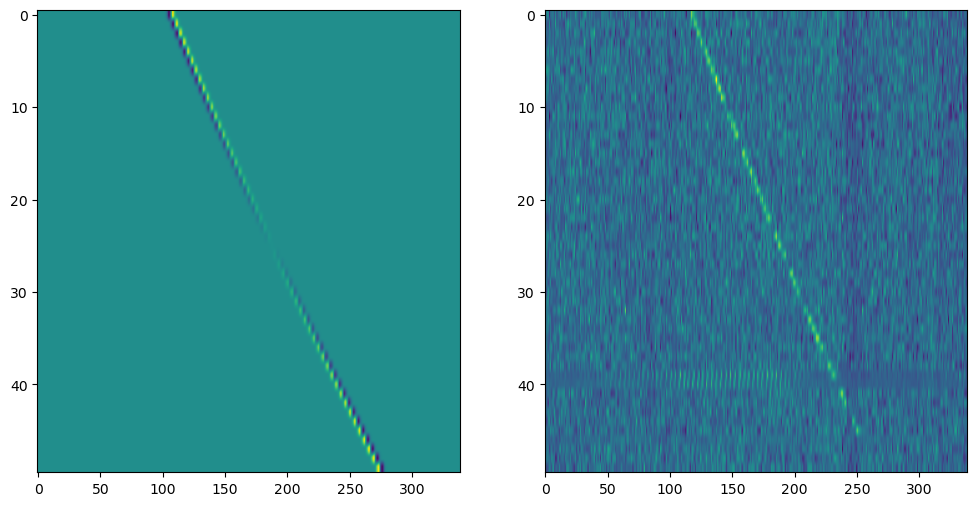

tensor(55.5355)
DM_pred 261.4052, DM_obs 282.5014. SWidth_pred 50.5588, SWidth_obs 4254.5684 


<Figure size 2000x1000 with 0 Axes>

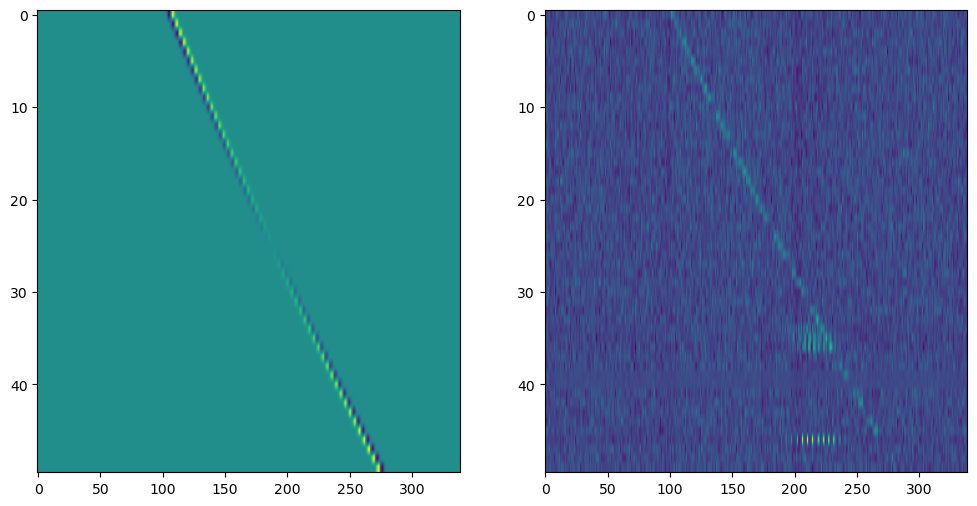

tensor(50.6798)
DM_pred 261.4052, DM_obs 216.0158. SWidth_pred 50.5588, SWidth_obs 4384.7935 


<Figure size 2000x1000 with 0 Axes>

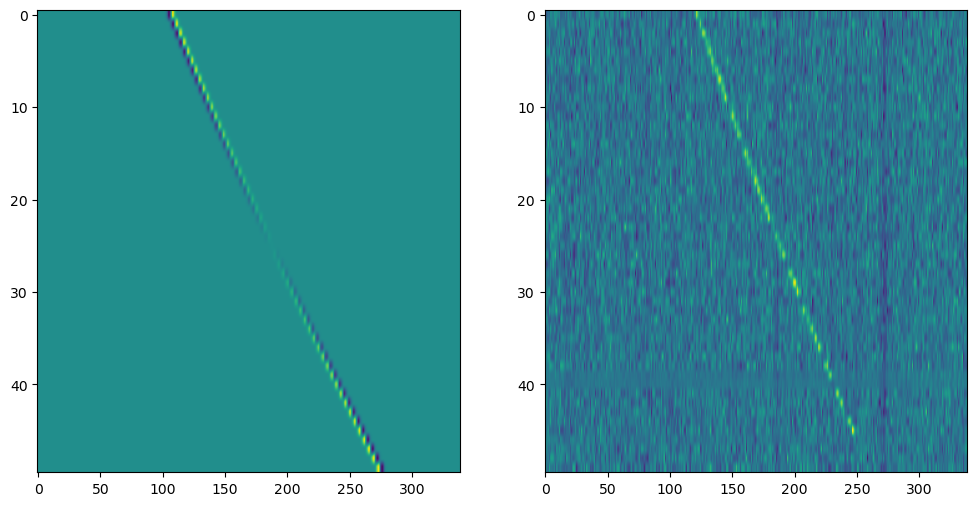

tensor(50.9207)
DM_pred 261.4052, DM_obs 203.2229. SWidth_pred 50.5588, SWidth_obs 4054.5471 


<Figure size 2000x1000 with 0 Axes>

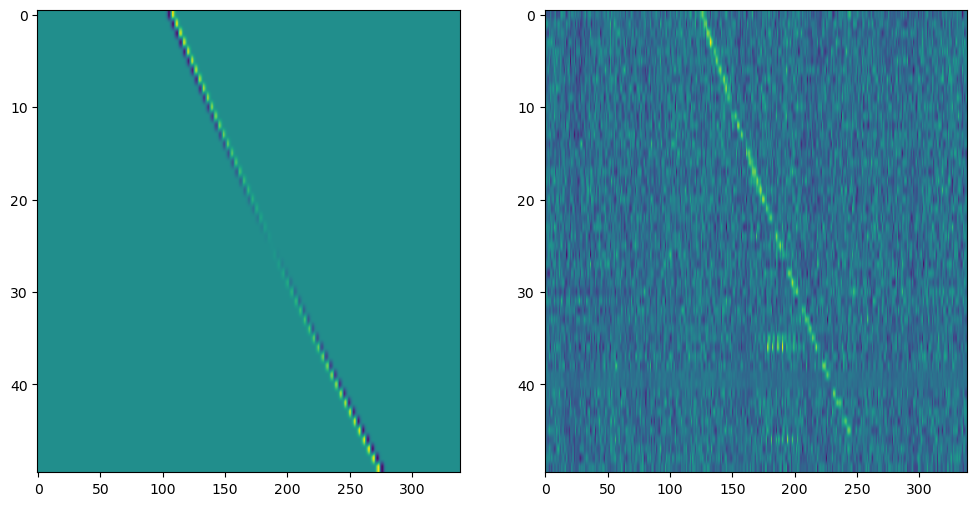

tensor(51.6155)
DM_pred 261.4052, DM_obs 250.0105. SWidth_pred 50.5588, SWidth_obs 4262.7490 


<Figure size 2000x1000 with 0 Axes>

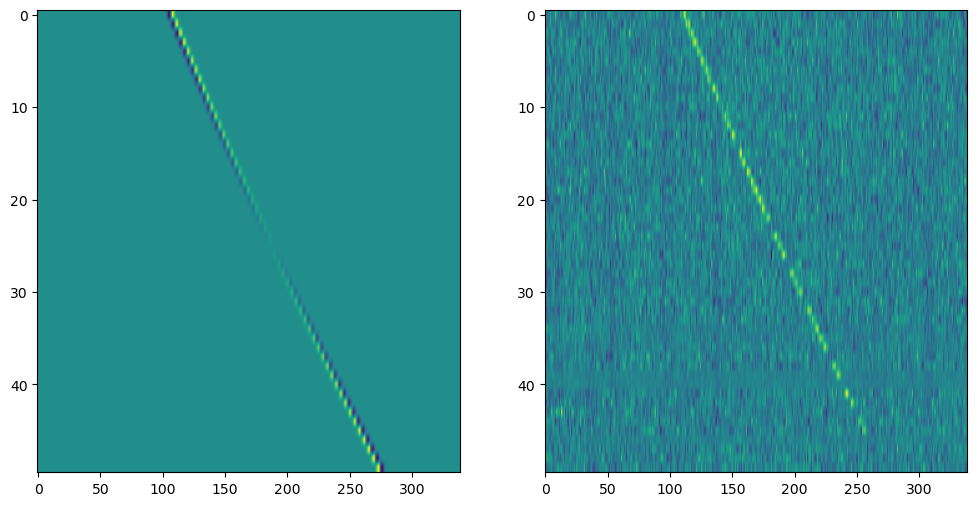

tensor(51.7973)
DM_pred 261.4052, DM_obs 228.1753. SWidth_pred 50.5588, SWidth_obs 4471.4023 


<Figure size 2000x1000 with 0 Axes>

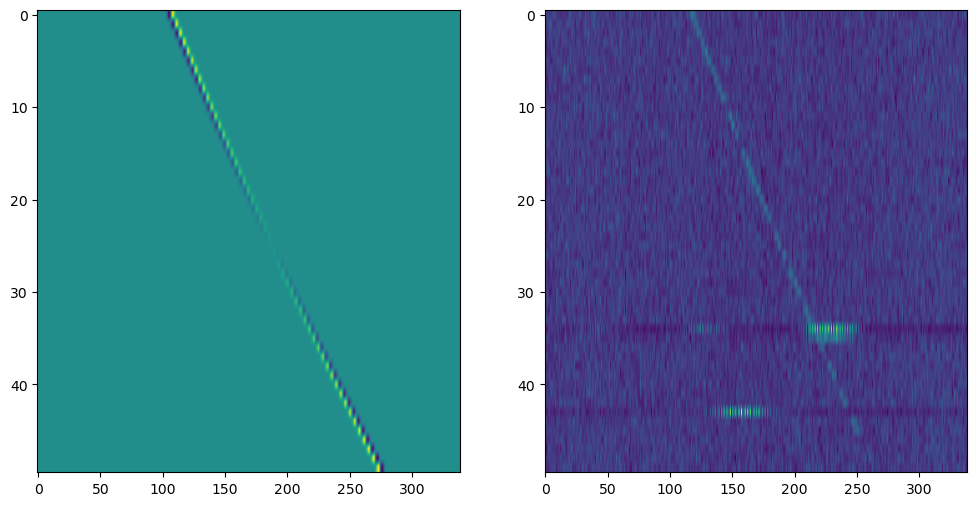

tensor(42.9596)
DM_pred 261.4052, DM_obs 270.5895. SWidth_pred 50.5588, SWidth_obs 4345.5669 


<Figure size 2000x1000 with 0 Axes>

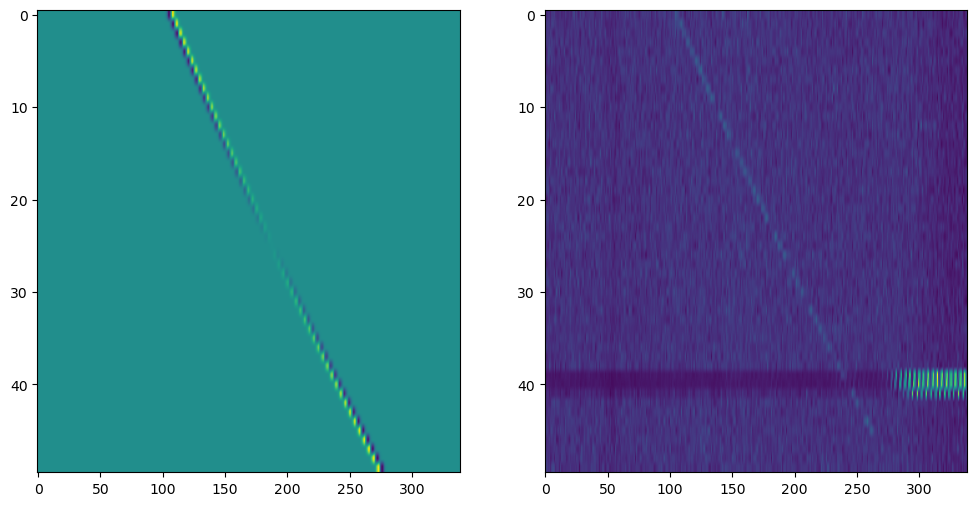

tensor(51.6401)
DM_pred 261.4052, DM_obs 255.8161. SWidth_pred 50.5588, SWidth_obs 4606.5073 


<Figure size 2000x1000 with 0 Axes>

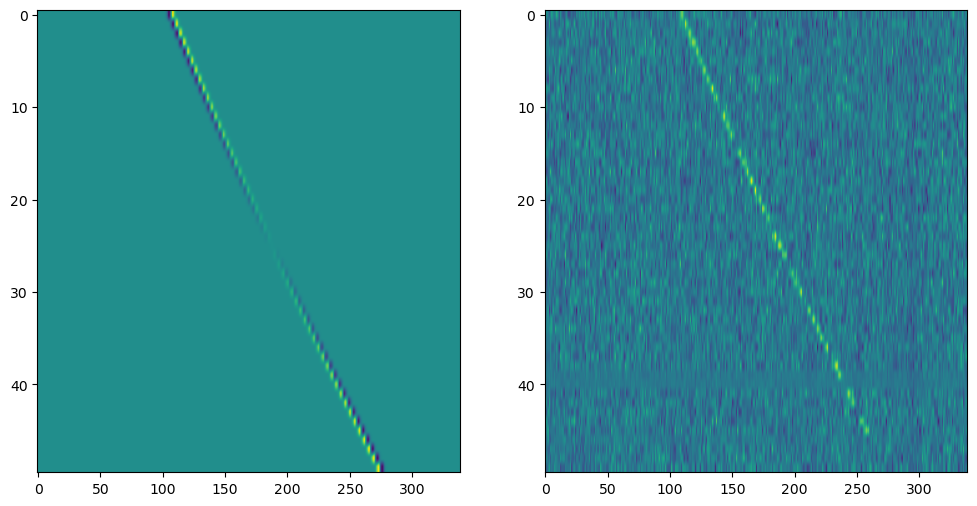

In [26]:
for val in super_test: 
  #model.eval()
  print(torch.max(val[0])/torch.std(val[0]))
  x_hat_params, x_hat_noise, params = model(val[0].view(1,x_size*50))
  #print(torch.max(x_hat_params[0]+x_hat_noise))
  fig = plt.figure(figsize=(20,10))
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
  ax1.imshow((x_hat_params[0]+x_hat_noise[0]).detach().numpy(), aspect='auto')
  ax2.imshow(val[0].detach().numpy(),aspect='auto')
  print('DM_pred {:.4f}, DM_obs {:.4f}. SWidth_pred {:.4f}, SWidth_obs {:.4f} '.format(params[0].item(),val[1], params[1].item(),val[2]))
  plt.show()